In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import pandas as pd

In [3]:
my_columns = ['[KCl](M)', 'dH(kJ/mol)','ddH(kJ/mol)','dS(J/K/mol)','ddS(J/K/mol)']
my_array = np.array([[1.0, 90.4, 9.664, 78.0, 29.42],
                     [2.0, 64.2, 3.408, 2.60, 11.342],
                     [3.0, 68.2, 3.283, 16.4, 10.72],
                     [4.0, 64.7, 4.110, 12.2, 13.48]])

df = pd.DataFrame(my_array, columns = my_columns)

print(df)
print(type(df))

   [KCl](M)  dH(kJ/mol)  ddH(kJ/mol)  dS(J/K/mol)  ddS(J/K/mol)
0       1.0        90.4        9.664         78.0        29.420
1       2.0        64.2        3.408          2.6        11.342
2       3.0        68.2        3.283         16.4        10.720
3       4.0        64.7        4.110         12.2        13.480
<class 'pandas.core.frame.DataFrame'>


<BarContainer object of 4 artists>

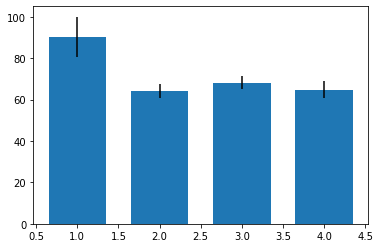

In [4]:
plt.bar(df['[KCl](M)'], df['dH(kJ/mol)'], yerr=df['ddH(kJ/mol)'], width=0.7)

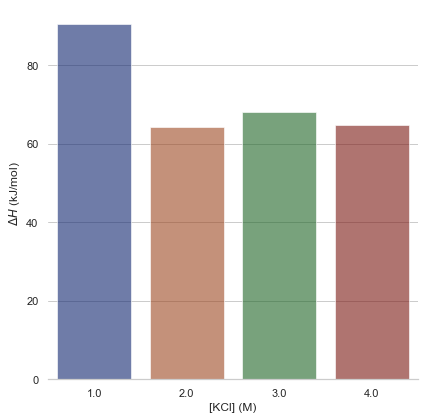

In [5]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x='[KCl](M)', y='dH(kJ/mol)', ci='ddH(kJ/mol)', palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels('[KCl] (M)', "$\Delta H$ (kJ/mol)")

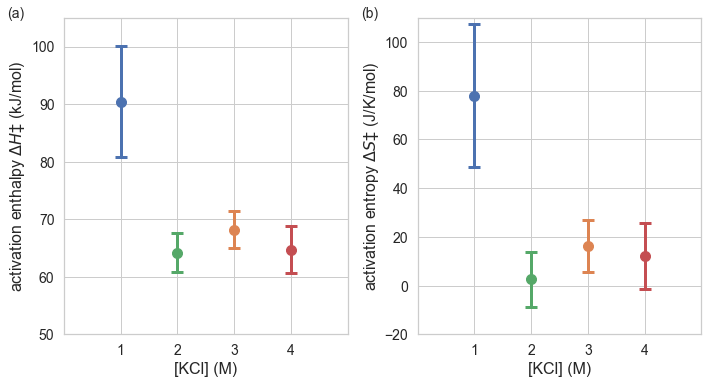

In [6]:
# plot:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5.5)) 
molarity = [1,2,3,4]
colors = ["C0","C2","C1","C3"]
dH = [90.4,64.2,68.2,64.7]
ddH = [9.664,3.408,3.283,4.110]
for colors_,m,dH_,ddH_ in zip(colors,molarity,dH,ddH):
  ax1.errorbar(m, dH_, ddH_, fmt='o',linewidth=3, markersize=10, capsize=6, capthick=3,color=colors_)

ax1.set(xlim=(0, 5), xticks=np.arange(1, 5), ylim=(50, 105), yticks=np.arange(50, 110, 10))
ax1.set_xlabel('[KCl] (M)',fontsize=16)
ax1.set_ylabel('activation enthalpy $\Delta H$' + u"\u2021" + ' (kJ/mol)',fontsize=16)
ax1.tick_params(labelsize=14)

dS = [78.0,2.60,16.4,12.2]
ddS = [29.42,11.342,10.72,13.48]
for colors_,m,dS_,ddS_ in zip(colors,molarity,dS,ddS):
  ax2.errorbar(m, dS_, ddS_, fmt='o',linewidth=3, markersize=10, capsize=6, capthick=3,color=colors_)

#ax2.errorbar(df['[KCl](M)'], df['dS(J/K/mol)'], df['ddS(J/K/mol)'], fmt='o',linewidth=3, markersize=10, capsize=6, capthick=3)
ax2.set(xlim=(0, 5), xticks=np.arange(1, 5), ylim=(-20, 110), yticks=np.arange(-20, 110, 20))
ax2.set_xlabel('[KCl] (M)',fontsize=16)
ax2.set_ylabel('activation entropy $\Delta S$' + u"\u2021" + ' (J/K/mol)',fontsize=16)
ax2.tick_params(labelsize=14)

ax1.text(-1,105,"(a)",fontsize=14)
ax2.text(-1,110,"(b)",fontsize=14)

fig.tight_layout()
plt.show()

fig.savefig("../Figure6.png")